In [89]:
import tensorflow as tf



In [90]:
train_data= tf.keras.utils.image_dataset_from_directory("../data/train",image_size=(48,48),batch_size=32, color_mode="grayscale")
test_data = tf.keras.utils.image_dataset_from_directory("../data/test",image_size=(48,48),batch_size=32, color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [91]:
print(train_data,train_data.class_names)
print(test_data,test_data.class_names)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


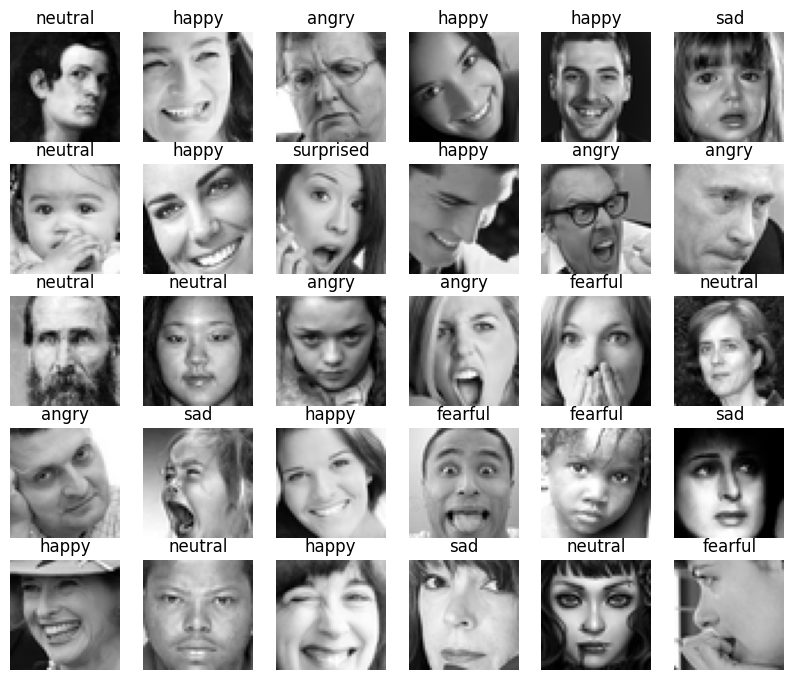

2025-11-11 09:50:29.995782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [92]:
import matplotlib.pyplot as plt

for image,label in train_data.take(1):
    plt.figure(figsize=(10,10))
    for i in range(30):
        plt.subplot(6,6,i+1)
        plt.imshow(image[i].numpy().astype("uint8"),cmap="gray")
        plt.title(train_data.class_names[(label[i])])
        plt.axis("off")
    plt.show()
    plt.close()

In [94]:
for images, labels in train_data.take(1):
    print("Shape des labels :", labels.shape)
    print("Exemple de label :", labels[0])

Shape des labels : (32,)
Exemple de label : tf.Tensor(3, shape=(), dtype=int32)


2025-11-11 09:58:14.481989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [96]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator



#Data Augmentation + Normalisation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#Normalisation
test_datagen = ImageDataGenerator(rescale=1./255)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.GlobalAveragePooling2D(),# remplace Flatten() → réduit les paramètres et évite l’overfitting. on calcul mean
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), #50% des neurones sont désactivés au hasard.Ça empêche le modèle de dépendre trop de certains neurones.
    layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,         # le learning rate sera divisé par 5 (0.001 → 0.0002)
    patience=3,         # attend 2 epochs sans amélioration
    min_lr=1e-6,        # limite minimale
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,
    callbacks=[early_stop, checkpoint,reduce_lr]
)

test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


Epoch 1/30


/Users/miriambenali/Desktop/Project-Simplon/Facial-Detection_DeepLearning/myvenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


898/898 ━━━━━━━━━━━━━━━━━━━━ 141s 154ms/step - accuracy: 0.2606 - loss: 1.8377 - val_accuracy: 0.3030 - val_loss: 1.7069 - learning_rate: 1.0000e-04
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 102s 113ms/step - accuracy: 0.3355 - loss: 1.6785 - val_accuracy: 0.3742 - val_loss: 1.5927 - learning_rate: 1.0000e-04
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 102s 114ms/step - accuracy: 0.3807 - loss: 1.5877 - val_accuracy: 0.4128 - val_loss: 1.5293 - learning_rate: 1.0000e-04
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 102s 114ms/step - accuracy: 0.4124 - loss: 1.5234 - val_accuracy: 0.4400 - val_loss: 1.4542 - learning_rate: 1.0000e-04
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 105s 117ms/step - accuracy: 0.4388 - loss: 1.4627 - val_accuracy: 0.4585 - val_loss: 1.4338 - learning_rate: 1.0000e-04
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 99s 110ms/step - accuracy: 0.4591 - loss: 1.4152 - val_accuracy: 0.4755 - val_loss: 1.3814 - learning_rate: 1.0000e-04
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 96s 107ms/st

In [98]:
model.save("facial_model.keras")